In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [196]:
train_data = pd.read_csv("train.csv")

In [197]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [198]:
train_data.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

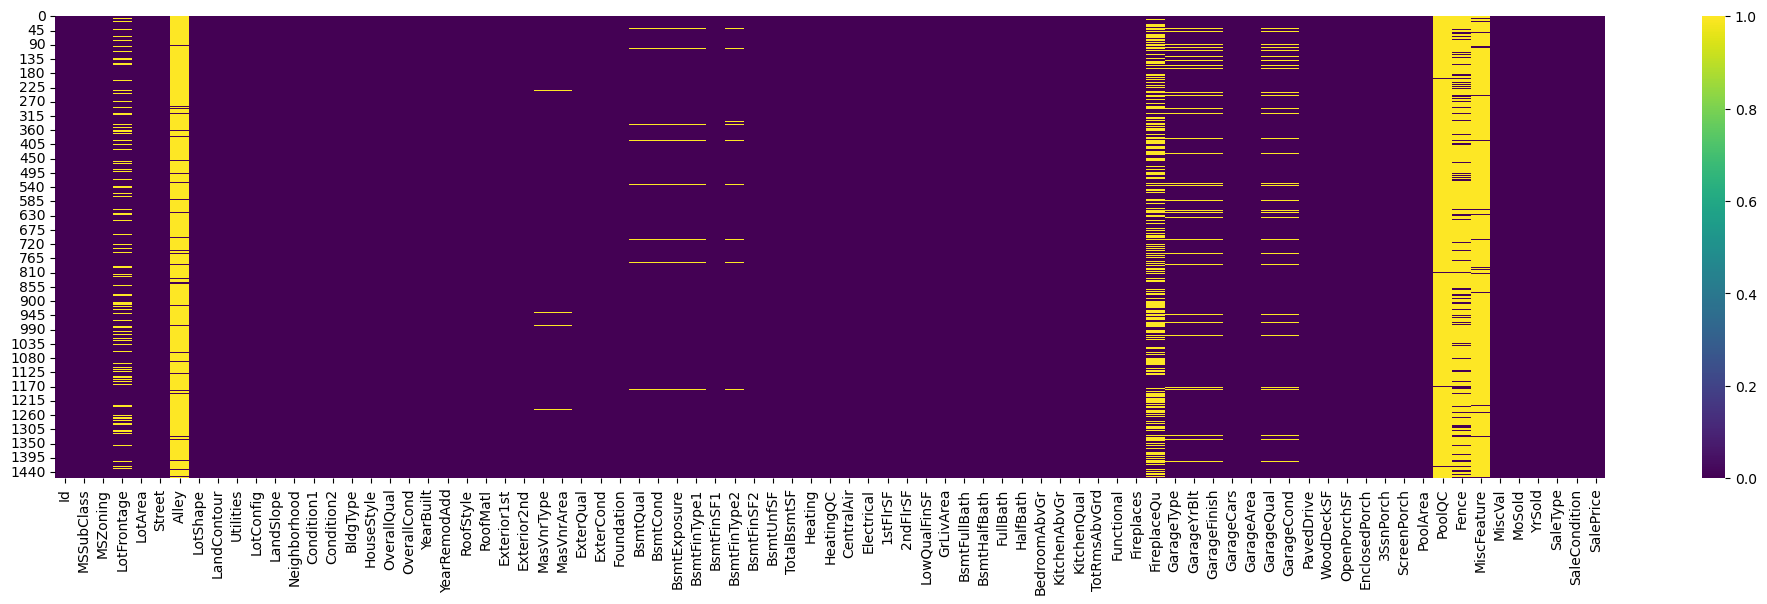

In [199]:
plt.figure(figsize=(25,6))

sns.heatmap(train_data.isnull(), cmap='viridis')

In [200]:
columns = ['Alley','PoolQC', 'Fence','MiscFeature']
train_data = train_data.drop(columns, axis = 1)

In [201]:
train_data['LotFrontage'] = train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())

In [202]:
train_data['FireplaceQu'] = train_data['FireplaceQu'].fillna(train_data['FireplaceQu'].mode()[0])

In [203]:
train_data['GarageYrBlt'] = train_data['GarageYrBlt'].fillna(train_data['GarageYrBlt'].mean())

In [204]:
train_data['GarageType'] = train_data['GarageType'].fillna(train_data['GarageType'].mode()[0])

In [205]:
train_data['GarageFinish'] = train_data['GarageFinish'].fillna(train_data['GarageFinish'].mode()[0])
train_data['GarageQual'] = train_data['GarageQual'].fillna(train_data['GarageQual'].mode()[0])
train_data['GarageCond'] = train_data['GarageCond'].fillna(train_data['GarageCond'].mode()[0])

In [206]:
train_data['BsmtQual'] = train_data['BsmtQual'].fillna(train_data['BsmtQual'].mode()[0])

In [207]:
train_data['BsmtCond'] = train_data['BsmtCond'].fillna(train_data['BsmtCond'].mode()[0])

In [208]:
train_data['BsmtExposure'] = train_data['BsmtExposure'].fillna(train_data['BsmtExposure'].mode()[0])
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].fillna(train_data['BsmtFinType1'].mode()[0])

In [209]:
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].fillna(train_data['BsmtFinType2'].mode()[0])

In [210]:
train_data['BsmtFinSF2'] = train_data['BsmtFinSF2'].fillna(train_data['BsmtFinSF2'].mean())

In [211]:
train_data['MasVnrArea'] = train_data['MasVnrArea'].fillna(train_data['MasVnrArea'].mean())

In [212]:
train_data['MasVnrType'] = train_data['MasVnrType'].fillna(train_data['MasVnrType'].mode()[0])

<AxesSubplot:>

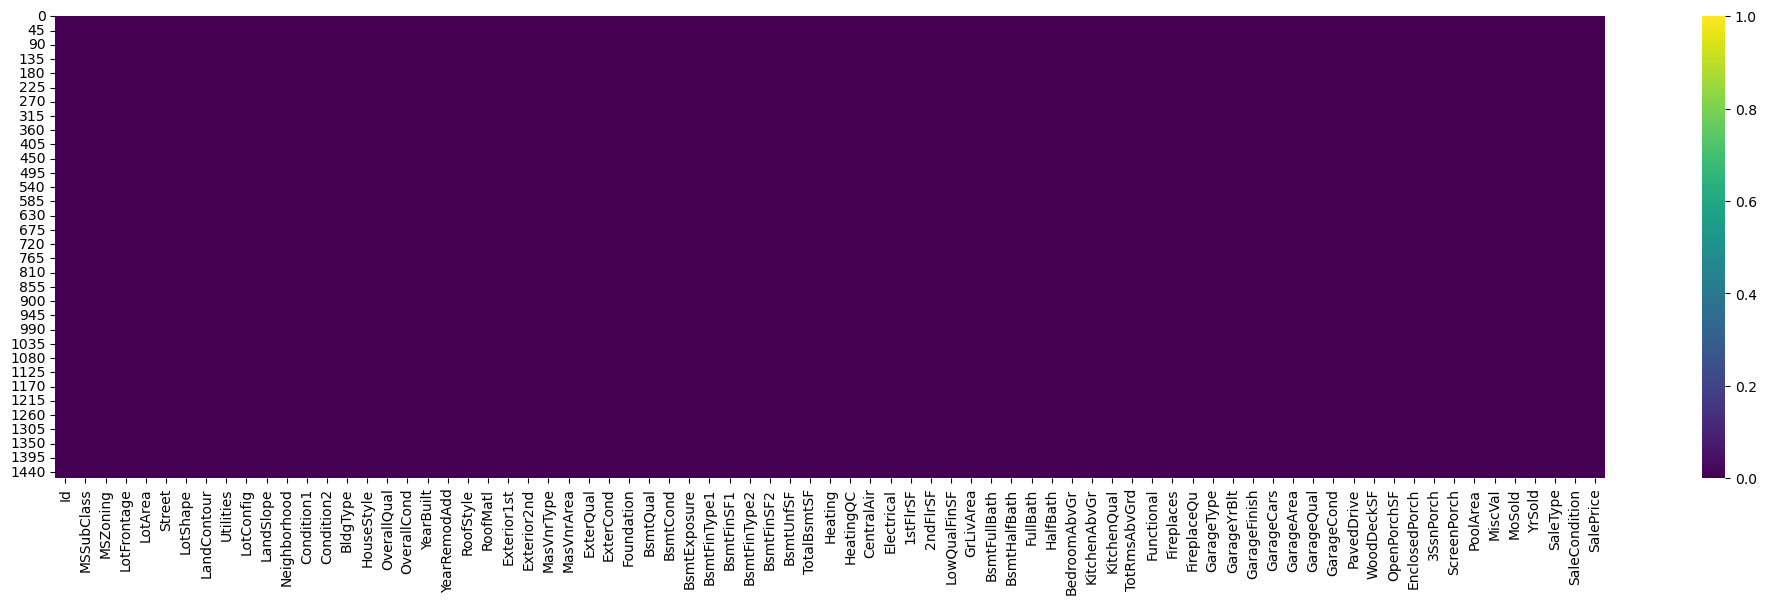

In [213]:
plt.figure(figsize=(25,6))
sns.heatmap(train_data.isnull(), cmap='viridis')

In [214]:
X_train = train_data.drop(['SalePrice'], axis = 1)

In [215]:
y_train = train_data['SalePrice']

In [216]:
X_train.shape

(1460, 76)

In [217]:
X_test = pd.read_csv("newtestdata.csv")

In [218]:
X_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


In [219]:
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']


In [220]:
from sklearn.preprocessing import OneHotEncoder

In [221]:
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(X_test[object_cols]))

OH_cols_train.index = X_train.index
OH_cols_test.index = X_test.index

num_X_train = X_train.drop(object_cols, axis=1)
num_X_test = X_test.drop(object_cols, axis=1)

OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_test = pd.concat([num_X_test, OH_cols_test], axis=1)

OH_X_train.columns = OH_X_train.columns.astype(str)
OH_X_test.columns = OH_X_test.columns.astype(str)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [222]:
OH_X_test.loc[:, OH_X_test.isnull().any()].head()

,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageCars,GarageArea
0,468.0,270.0,882.0,0.0,0.0,1.0,730.0
1,923.0,406.0,1329.0,0.0,0.0,1.0,312.0
2,791.0,137.0,928.0,0.0,0.0,2.0,482.0
3,602.0,324.0,926.0,0.0,0.0,2.0,470.0
4,263.0,1017.0,1280.0,0.0,0.0,2.0,506.0


In [223]:
OH_X_test['BsmtFinSF1'] = OH_X_test['BsmtFinSF1'].fillna(OH_X_test['BsmtFinSF1'].mean())
OH_X_test['TotalBsmtSF'] = OH_X_test['TotalBsmtSF'].fillna(OH_X_test['TotalBsmtSF'].mean())
OH_X_test['BsmtUnfSF'] = OH_X_test['BsmtUnfSF'].fillna(OH_X_test['BsmtUnfSF'].mean())
OH_X_test['BsmtFullBath'] = OH_X_test['BsmtFullBath'].fillna(OH_X_test['BsmtFullBath'].mean())
OH_X_test['BsmtHalfBath'] = OH_X_test['BsmtHalfBath'].fillna(OH_X_test['BsmtHalfBath'].mean())
OH_X_test['GarageCars'] = OH_X_test['GarageCars'].fillna(OH_X_test['GarageCars'].mean())
OH_X_test['GarageArea'] = OH_X_test['GarageArea'].fillna(OH_X_test['GarageArea'].mean())

In [224]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)

In [225]:
regr.fit(OH_X_train, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [226]:
pred = regr.predict(OH_X_test)

In [229]:
output = pd.DataFrame({'Id': OH_X_test['Id'],
                       'SalePrice': pred})

In [230]:
output

,Id,SalePrice
0,1461,133699.697602
1,1462,139831.537353
2,1463,151419.346014
3,1464,156733.893538
4,1465,267293.178892
...,...,...
1454,2915,133699.697602
1455,2916,133699.697602
1456,2917,135240.751993
1457,2918,133699.697602


In [231]:
output.to_csv('new_submission.csv', index=False)